Linear Regression

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']
<class 'pandas.core.frame.DataFrame'>
Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            40108 non-null  object 
 1   bat_team        40108 non-null  object 
 2   bowl_team       40108 non-null  object 
 3   runs            40108 non-null  int64  
 4   wickets         40108 non-null  int64  
 5   overs           40108 non-null  float64
 6   runs_last_5     40108 non-null  int64  
 7   wickets_last_5  40108 non-null  int64  
 8   total           40108 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usag

'X_train'

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
32,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,61,0,5.1,59,0


'X_test'

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
68894,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,46,1,5.1,42,1


C:\Users\venka\AppData\Local\Temp\ipykernel_20444\368062604.py:119: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


MAE:  12.11861754619329
MSE:  251.00792310417467
RMSE:  15.843229566732115
[185.38608734]
rounded score is:  [185.]
Mean Absolute Error: 12.11861754619329
Mean Squared Error: 251.00792310417467
Root Mean Squared Error: 15.843229566732115
R-squared: 0.7522633566350524


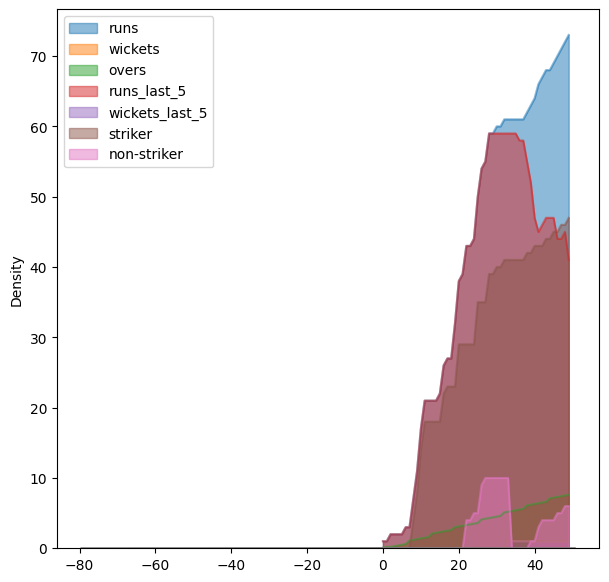

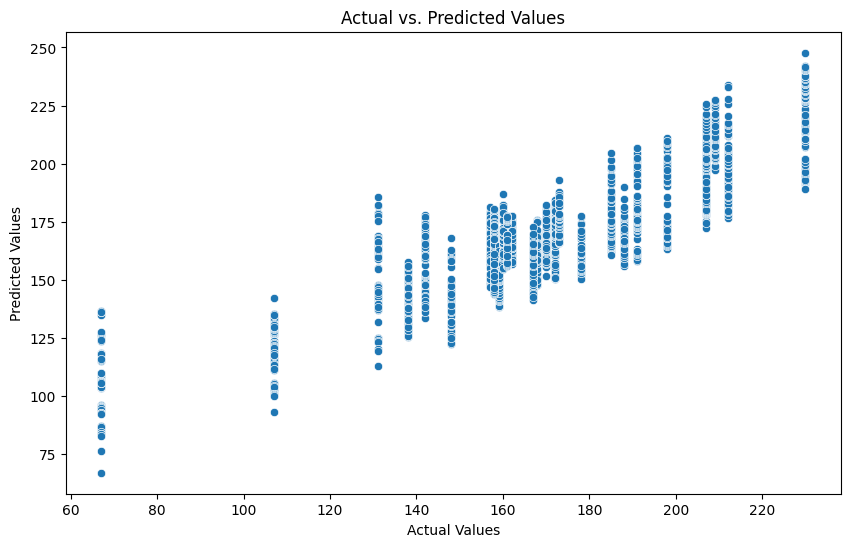

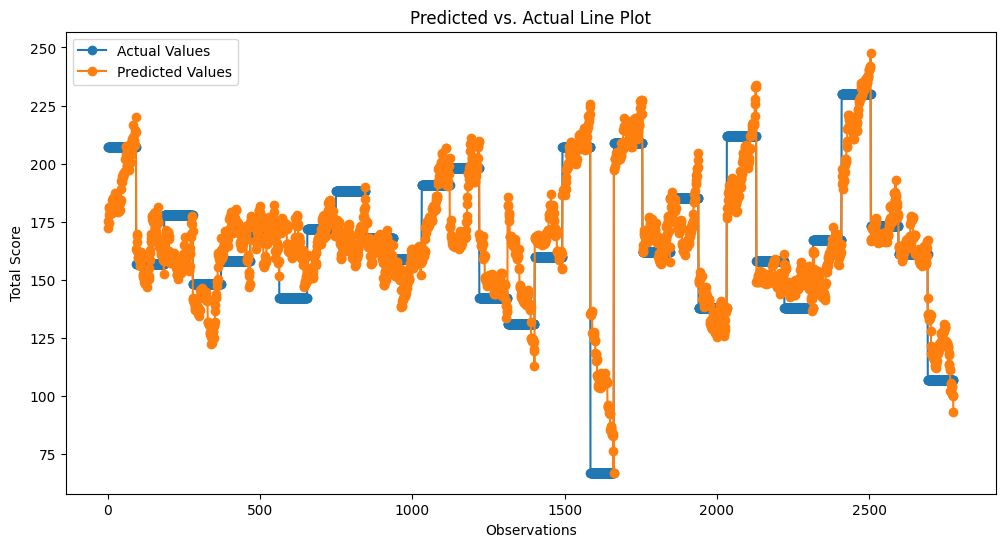

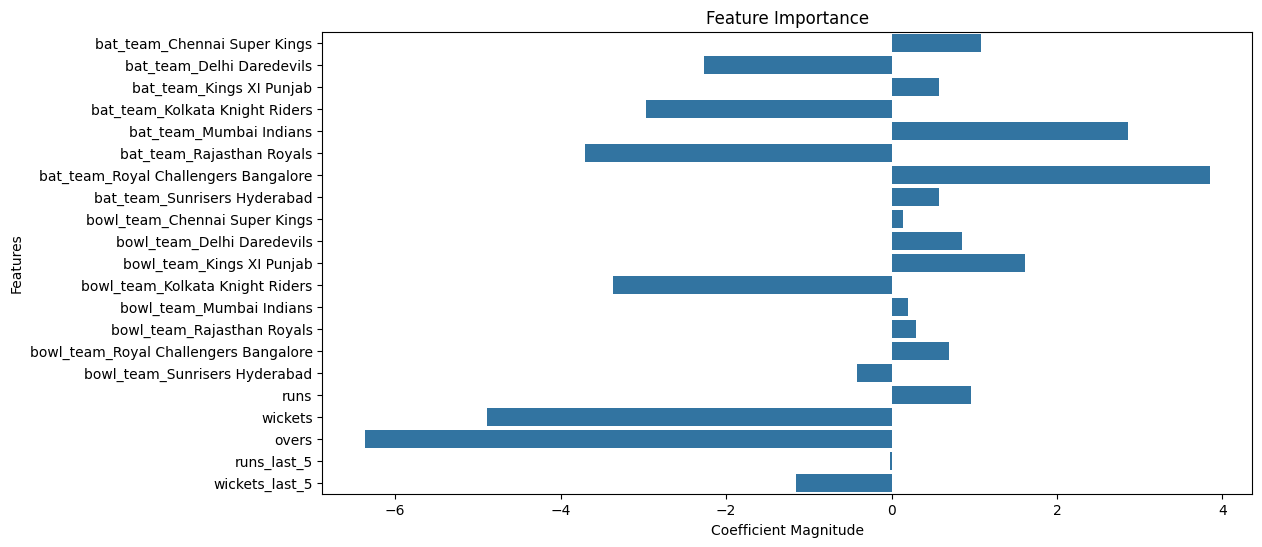

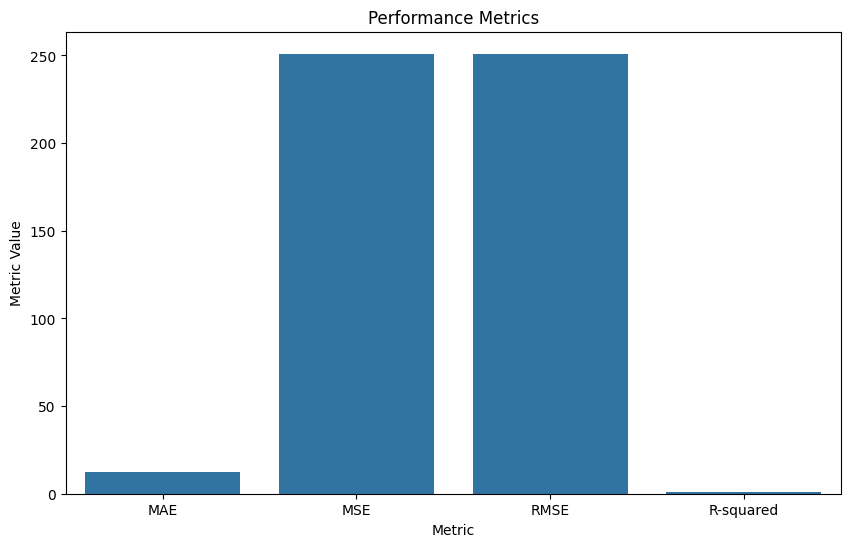

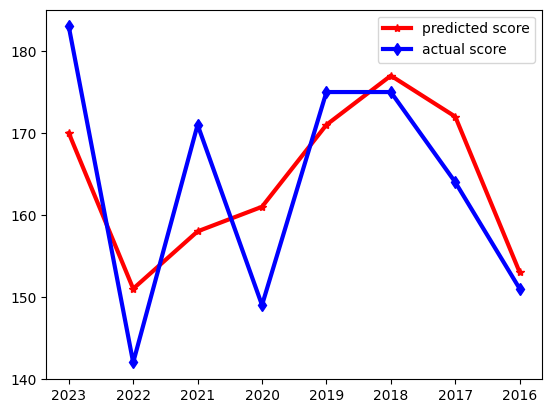

In [10]:
# dependecies
import pandas as pd
import pickle


# loading dataset
df = pd.read_csv('ipl.csv')
df.head(2)

#checking shape of data
df.shape

# check null values and then sum it up
df.isnull().sum()
# Check summary stats using df.describe()
df.describe()

df.columns

# plot area / contributions in dataset
df[['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker']][:50].plot(kind = 'area', figsize = (7,7), stacked = False)

# Removing unwanted cols - reduce memory size
cols_to_remove = ['mid' , 'venue' , 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=cols_to_remove , axis=1 , inplace = True)

#corss check
df.head(3)
df.shape

# checking for how many batting teams are there
df['bat_team'].unique()

# only keep current team which are present
consistent_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

# filtering based on consistency
df = df[(df['bat_team'].isin(consistent_team)) & (df['bowl_team'].isin(consistent_team))]

df.head()

# printing out unique team after filtering
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

# since for every match one can predict more accurately if one has 5 over data so,
# filtering based on 5 overs
df = df[df['overs']>=5.0]
df.head()

df.head()

# getting data type
df.info()

# converting date cols from string to date time object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

df['date'].dtype

# converting categorical features using 'One Hot Encoding' # for numerical values
cat_df = pd.get_dummies(data = df, columns = ['bat_team' , 'bowl_team'])

cat_df.head(2)

# getting cols
cat_df.columns

# rearranging cols
cat_df = cat_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore','bowl_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']]

# split the data into train and test - based on date column
X_train = cat_df.drop(labels = 'total', axis = 1)[cat_df['date'].dt.year <= 2016]
X_test = cat_df.drop(labels = 'total', axis = 1) [cat_df['date'].dt.year >= 2017]

# since only one column so cosidered as series
y_train = cat_df[cat_df['date'].dt.year <= 2016]['total'].values
y_test = cat_df[cat_df['date'].dt.year >= 2017]['total'].values

#checking shape
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

# since the requirement of our date colum is over so we can drop it
# dropping date column
X_train.drop(labels = 'date', axis = True, inplace = True)
X_test.drop(labels = 'date', axis = True, inplace = True)


# use display to cross check in single line
display("X_train", X_train.head(1))
display("X_test", X_test.head(1))


# intial buid
# import module
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# trainong model
reg.fit(X_train , y_train)

# getting predictions
prediction = reg.predict(X_test)

# plottoing our fit
import seaborn as sns
sns.distplot(y_test-prediction)

# checking for scores
from sklearn import metrics
import numpy as np # dependency

# Mean Absolute Error
print('MAE: ', metrics.mean_absolute_error(y_test , prediction))

# Mean Squared Error
print('MSE: ', metrics.mean_squared_error(y_test, prediction))

# Root Mean Squared Error
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# creating our model pickel file - saving model
file_name = 'ipl_score_predict_Linear_Regression_model.pkl'
pickle.dump(reg , open(file_name,'wb'))


import pandas as pd
import numpy as np
from datetime import datetime

# Example input values
user_input = {
    'bat_team': 'Rajasthan Royals',
    'bowl_team': 'Mumbai Indians',
    'overs': 11,
    'runs': 108,
    'wickets': 2,
    'runs_last_5': 60,
    'wickets_last_5': 0
}
# Create a DataFrame with the user input
# Handle Categorical Variables
user_df = pd.DataFrame([user_input])
# Ensure that the categorical encoding matches the training data
user_df_encoded = pd.get_dummies(data=user_df, columns=['bat_team', 'bowl_team'])
user_df_encoded = user_df_encoded.reindex(columns=X_train.columns, fill_value=0)
# Make Predictions
predictions = reg.predict(user_df_encoded)
# Display the predictions
print(predictions)
# Make Predictions and round off to the nearest integer
rounded_predictions = np.round(reg.predict(user_df_encoded))
# Display the rounded predictions
print("rounded score is: ", rounded_predictions)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)

# Display the metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=prediction)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# Line plot of predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', marker='o')
plt.plot(prediction, label='Predicted Values', marker='o')
plt.title('Predicted vs. Actual Line Plot')
plt.xlabel('Observations')
plt.ylabel('Total Score')
plt.legend()
plt.show()


# Feature importance plot (if applicable)
if hasattr(reg, 'coef_'):
    feature_importance = reg.coef_
    feature_names = X_train.columns

    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature_importance, y=feature_names)
    plt.title('Feature Importance')
    plt.xlabel('Coefficient Magnitude')
    plt.ylabel('Features')
    plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

# Create a DataFrame for better visualization
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [mae, mse, rmse, r2]
})

# Bar plot for performance metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df)
plt.title('Performance Metrics')
plt.ylabel('Metric Value')
plt.show()


s1= [170,151,158,161,171,177,172,153]
s3=['2023','2022','2021','2020','2019','2018','2017','2016']
s2=[183,142,171,149,175,175,164,151]
plt.plot(s3,s1,label='predicted score',color='red',marker='*',lw=3)
plt.plot(s3,s2,label='actual score',color='blue',marker='d',lw=3)
plt.legend()
plt.show()

Random Forrest

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']
<class 'pandas.core.frame.DataFrame'>
Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            40108 non-null  object 
 1   bat_team        40108 non-null  object 
 2   bowl_team       40108 non-null  object 
 3   runs            40108 non-null  int64  
 4   wickets         40108 non-null  int64  
 5   overs           40108 non-null  float64
 6   runs_last_5     40108 non-null  int64  
 7   wickets_last_5  40108 non-null  int64  
 8   total           40108 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usag

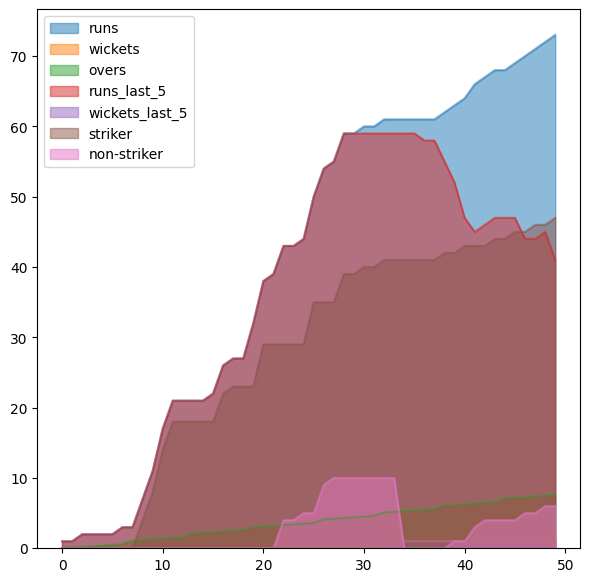

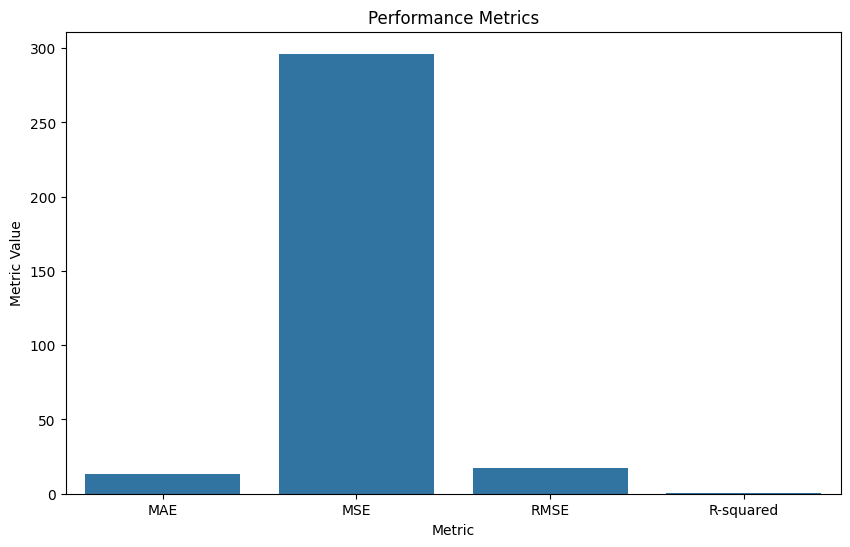


Random Forest Metrics for max_depth=11:
Mean Absolute Error: 13.133025900666217
Mean Squared Error: 296.2867737566776
Root Mean Squared Error: 17.212982709474776
R-squared: 0.7075746060276925

Best Random Forest Model (max_depth=11):
RandomForestRegressor(max_depth=11)

Random Forest Predicted Score for User Input: 192.65805681845043


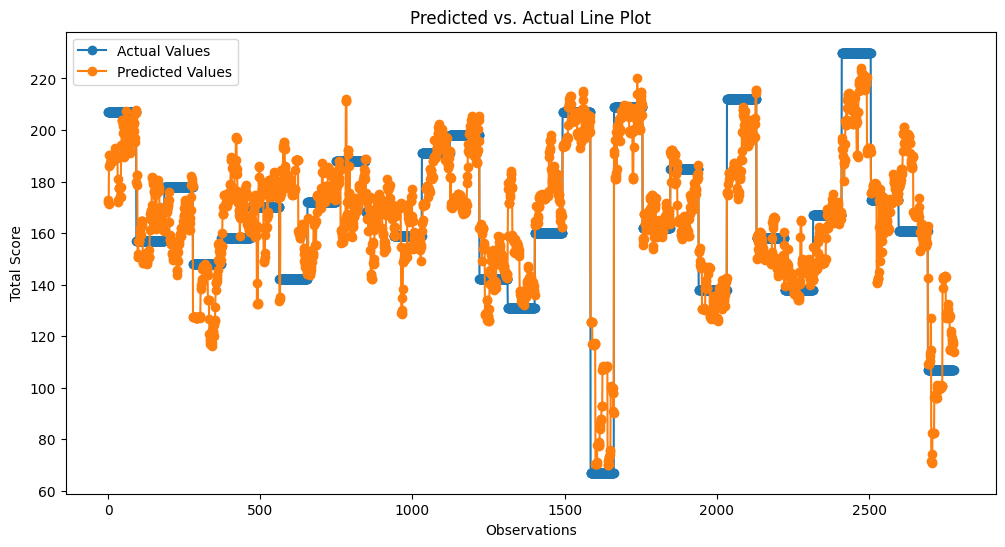

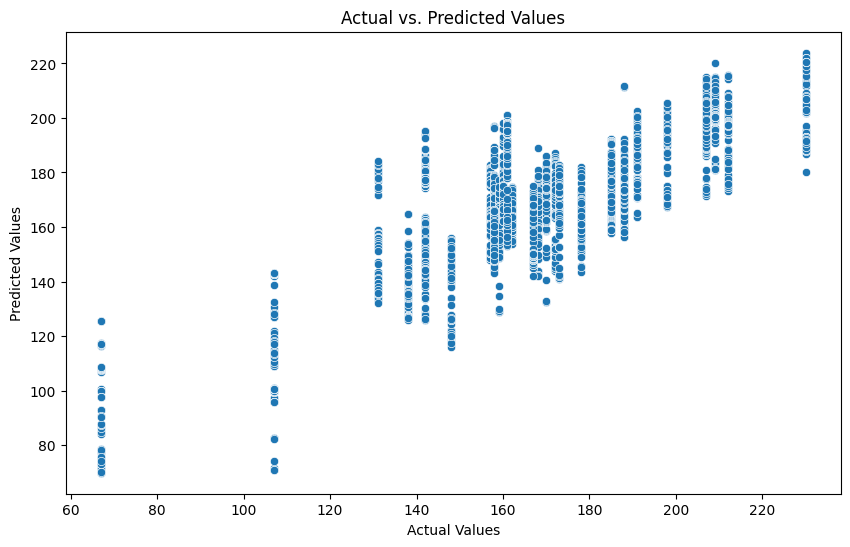

In [11]:
# Importing necessary libraries
import pandas as pd
import pickle
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('ipl.csv')

#checking shape of data
df.shape

# check null values and then sum it up
df.isnull().sum()
# Check summary stats using df.describe()
df.describe()

df.columns

# plot area / contributions in dataset
df[['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker']][:50].plot(kind = 'area', figsize = (7,7), stacked = False)

# Removing unwanted cols - reduce memory size
cols_to_remove = ['mid' , 'venue' , 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=cols_to_remove , axis=1 , inplace = True)

#corss check
df.head(3)
df.shape

# checking for how many batting teams are there
df['bat_team'].unique()

# only keep current team which are present
consistent_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

# filtering based on consistency
df = df[(df['bat_team'].isin(consistent_team)) & (df['bowl_team'].isin(consistent_team))]

df.head()

# printing out unique team after filtering
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

# since for every match one can predict more accurately if one has 5 over data so,
# filtering based on 5 overs
df = df[df['overs']>=5.0]
df.head()

df.head()

# getting data type
df.info()

# converting date cols from string to date time object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

df['date'].dtype

# converting categorical features using 'One Hot Encoding' # for numerical values
cat_df = pd.get_dummies(data = df, columns = ['bat_team' , 'bowl_team'])

cat_df.head(2)

# getting cols
cat_df.columns

# rearranging cols
cat_df = cat_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore','bowl_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']]


# Split data into train and test based on the date column
X_train = cat_df[cat_df['date'].dt.year <= 2016].drop(labels='total', axis=1)
X_test = cat_df[cat_df['date'].dt.year >= 2017].drop(labels='total', axis=1)

# Ensure 'total' is considered as a Series
y_train = cat_df[cat_df['date'].dt.year <= 2016]['total'].values
y_test = cat_df[cat_df['date'].dt.year >= 2017]['total'].values

# Drop the date column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

# Optimize Random Forest Regression model by tuning max_depth
max_depth_values = [11]  # Adjust these values based on experimentation

best_rmse = float('inf')
for max_depth_val in max_depth_values:
    # Initialize Random Forest Regression model with specified max_depth
    rf_reg = RandomForestRegressor(max_depth=max_depth_val)

    # Train the model
    rf_reg.fit(X_train, y_train)

    # Make Predictions on the test set
    rf_predictions = rf_reg.predict(X_test)

    # Display Random Forest metrics for each max_depth value
    rf_mae = mean_absolute_error(y_test, rf_predictions)
    rf_mse = mean_squared_error(y_test, rf_predictions)  # Added MSE calculation
    rf_rmse = np.sqrt(rf_mse)
    rf_r2 = r2_score(y_test, rf_predictions)

    # Create a DataFrame for better visualization
    metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [rf_mae, rf_mse, rf_rmse, rf_r2]
    })

    # Bar plot for performance metrics
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Metric', y='Value', data=metrics_df)
    plt.title('Performance Metrics')
    plt.ylabel('Metric Value')
    plt.show()

    print(f'\nRandom Forest Metrics for max_depth={max_depth_val}:')
    print('Mean Absolute Error:', rf_mae)
    print('Mean Squared Error:', rf_mse)  # Print MSE
    print('Root Mean Squared Error:', rf_rmse)
    print('R-squared:', rf_r2)

    # Save the best model (based on lowest RMSE)
    if rf_rmse < best_rmse:
        best_rmse = rf_rmse
        best_max_depth = max_depth_val
        best_rf_model = rf_reg

print(f'\nBest Random Forest Model (max_depth={best_max_depth}):')
print(best_rf_model)

# Save the best Random Forest model
best_rf_model_filename = f'best_rf_model_max_depth_{best_max_depth}.pkl'
pickle.dump(best_rf_model, open(best_rf_model_filename, 'wb'))

# Function to preprocess user input and make predictions
def predict_user_score(user_input, model, feature_columns):
    # Create a DataFrame with the user input
    user_df = pd.DataFrame([user_input])

    # Handle Categorical Variables in user input
    user_df_encoded = pd.get_dummies(data=user_df, columns=['bat_team', 'bowl_team'])

    # Ensure columns are consistent with feature_columns used during training
    user_df_encoded = user_df_encoded.reindex(columns=feature_columns, fill_value=0)

    # Make Predictions for the user input using the provided model
    user_predictions = model.predict(user_df_encoded)

    return user_predictions[0]

# Example input values for user prediction
user_input = {
    'bat_team': 'Rajasthan Royals',
    'bowl_team': 'Mumbai Indians',
    'overs': 11,
    'runs': 108,
    'wickets': 2,
    'runs_last_5': 60,
    'wickets_last_5': 0
}

# Feature columns used during training
feature_columns = X_train.columns

# Make Predictions for the user input using the best Random Forest model
user_rf_prediction = predict_user_score(user_input, best_rf_model, feature_columns)

# Display the Random Forest prediction for the user input
print('\nRandom Forest Predicted Score for User Input:', user_rf_prediction)

# Line plot of predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', marker='o')
plt.plot(rf_predictions, label='Predicted Values', marker='o')
plt.title('Predicted vs. Actual Line Plot')
plt.xlabel('Observations')
plt.ylabel('Total Score')
plt.legend()
plt.show()


# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_predictions)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()



Svm

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']
<class 'pandas.core.frame.DataFrame'>
Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            40108 non-null  object 
 1   bat_team        40108 non-null  object 
 2   bowl_team       40108 non-null  object 
 3   runs            40108 non-null  int64  
 4   wickets         40108 non-null  int64  
 5   overs           40108 non-null  float64
 6   runs_last_5     40108 non-null  int64  
 7   wickets_last_5  40108 non-null  int64  
 8   total           40108 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usag

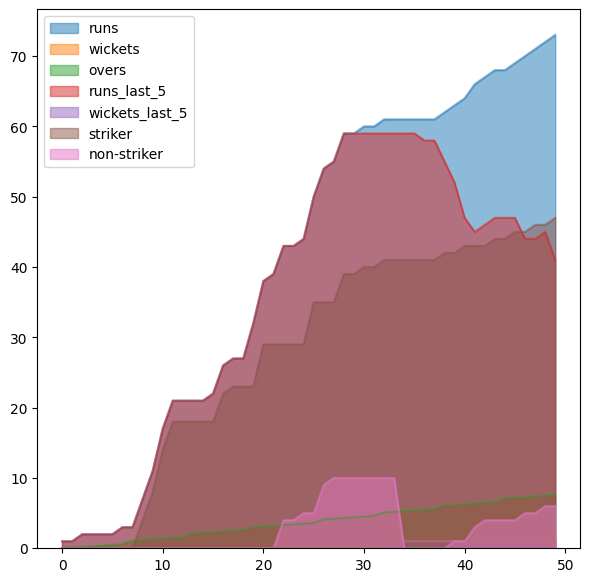

In [12]:
# Importing necessary libraries
import pandas as pd
import pickle
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('ipl.csv')

#checking shape of data
df.shape

# check null values and then sum it up
df.isnull().sum()
# Check summary stats using df.describe()
df.describe()

df.columns

# plot area / contributions in dataset
df[['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker']][:50].plot(kind = 'area', figsize = (7,7), stacked = False)

# Removing unwanted cols - reduce memory size
cols_to_remove = ['mid' , 'venue' , 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=cols_to_remove , axis=1 , inplace = True)

#corss check
df.head(3)
df.shape

# checking for how many batting teams are there
df['bat_team'].unique()

# only keep current team which are present
consistent_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

# filtering based on consistency
df = df[(df['bat_team'].isin(consistent_team)) & (df['bowl_team'].isin(consistent_team))]

df.head()

# printing out unique team after filtering
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

# since for every match one can predict more accurately if one has 5 over data so,
# filtering based on 5 overs
df = df[df['overs']>=5.0]
df.head()

df.head()

# getting data type
df.info()

# converting date cols from string to date time object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

df['date'].dtype

# converting categorical features using 'One Hot Encoding' # for numerical values
cat_df = pd.get_dummies(data = df, columns = ['bat_team' , 'bowl_team'])

cat_df.head(2)

# getting cols
cat_df.columns

# rearranging cols
cat_df = cat_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore','bowl_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']]


# Split data into train and test based on the date column
X_train = cat_df[cat_df['date'].dt.year <= 2016].drop(labels='total', axis=1)
X_test = cat_df[cat_df['date'].dt.year >= 2017].drop(labels='total', axis=1)

# Ensure 'total' is considered as a Series
y_train = cat_df[cat_df['date'].dt.year <= 2016]['total'].values
y_test = cat_df[cat_df['date'].dt.year >= 2017]['total'].values

# Drop the date column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

# Feature scaling for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optimize SVM model by tuning kernel
kernel_values = ['linear']  # Experiment with different kernels

best_svm_rmse = float('inf')

for kernel_val in kernel_values:
    # Initialize SVM model with specified kernel
    svm_reg = SVR(kernel=kernel_val)

    # Train the model
    svm_reg.fit(X_train_scaled, y_train)

    # Make Predictions on the test set
    svm_predictions = svm_reg.predict(X_test_scaled)

    # Display SVM metrics for each kernel value
    svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))
    print(f'\nSVM Metrics for kernel={kernel_val}:')
    print('Root Mean Squared Error:', svm_rmse)

    # Save the best model (based on lowest RMSE)
    if svm_rmse < best_svm_rmse:
        best_svm_rmse = svm_rmse
        best_kernel = kernel_val
        best_svm_model = svm_reg

print(f'\nBest SVM Model (kernel={best_kernel}):')
print(best_svm_model)

# Save the best SVM model
best_svm_model_filename = f'best_svm_model_kernel_{best_kernel}.pkl'
pickle.dump(best_svm_model, open(best_svm_model_filename, 'wb'))

# Example input values for user prediction
user_input = {
    'bat_team': 'Rajasthan Royals',
    'bowl_team': 'Mumbai Indians',
    'overs': 11,
    'runs': 108,
    'wickets':2 ,
    'runs_last_5':60,
    'wickets_last_5': 0
}

# Create a DataFrame with the user input
user_df = pd.DataFrame([user_input])

# Handle Categorical Variables in user input
user_df_encoded = pd.get_dummies(data=user_df, columns=['bat_team', 'bowl_team'])

# Ensure columns are consistent with X_train
user_df_encoded = user_df_encoded.reindex(columns=X_train.columns, fill_value=0)

# Feature scaling for user input
user_input_scaled = scaler.transform(user_df_encoded)

# Make Predictions for the user input using the best SVM model
svm_user_predictions = best_svm_model.predict(user_input_scaled)
print('SVM Predicted Score for User Input:', svm_user_predictions)

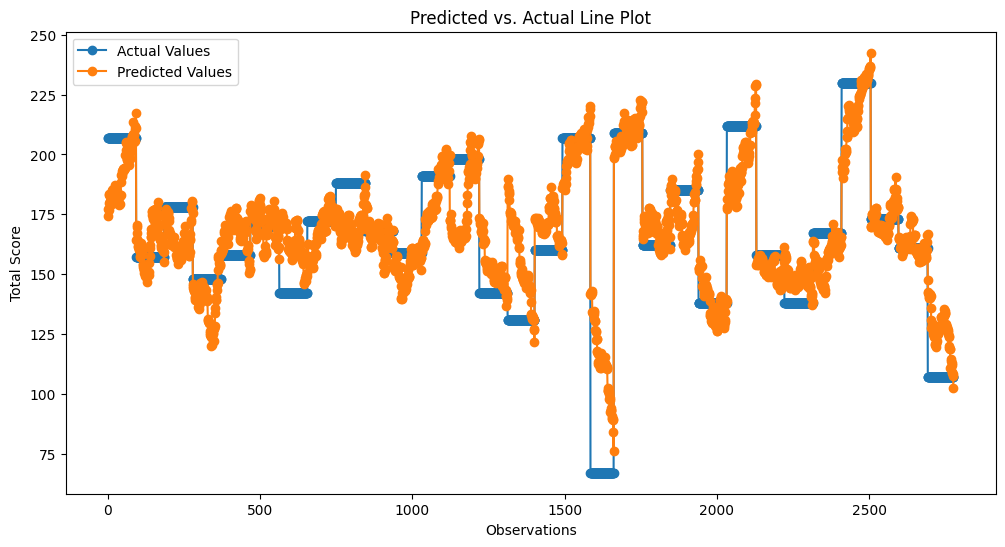

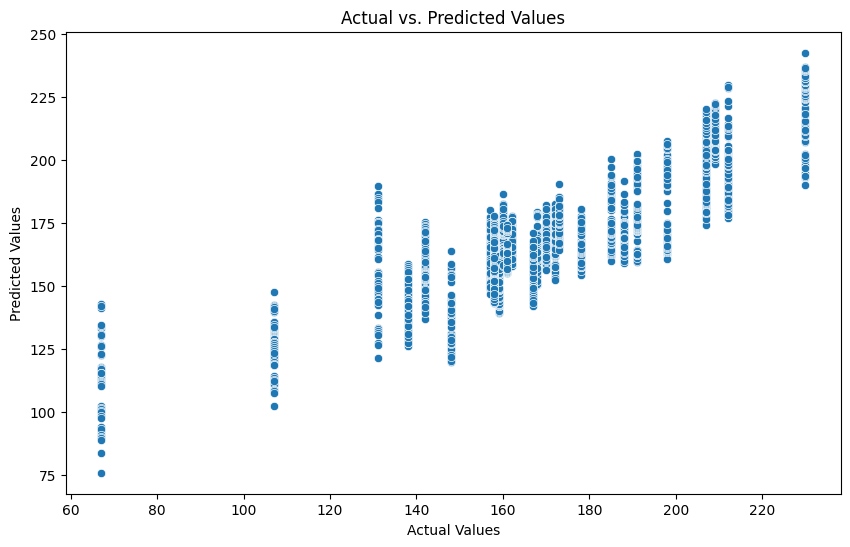


Metrics for the Loaded SVM Model:
Mean Absolute Error: 12.165096845685321
Mean Squared Error: 270.22722857232725
Root Mean Squared Error: 16.4385896162757
R-squared: 0.733294528218789


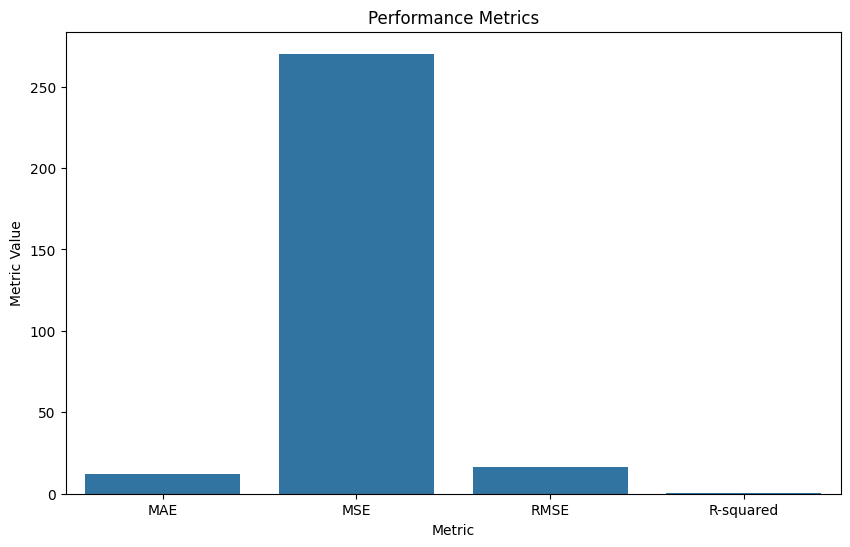

In [13]:
# Load the best SVM model from the saved pickle file
loaded_svm_model = pickle.load(open('best_svm_model_kernel_linear.pkl', 'rb'))

# Make Predictions on the test set using the loaded SVM model
loaded_svm_predictions = loaded_svm_model.predict(X_test_scaled)

# Calculate metrics for the loaded SVM model
loaded_svm_mae = mean_absolute_error(y_test, loaded_svm_predictions)
loaded_svm_mse = mean_squared_error(y_test, loaded_svm_predictions)
loaded_svm_rmse = np.sqrt(loaded_svm_mse)
loaded_svm_r2 = r2_score(y_test, loaded_svm_predictions)

# Line plot of predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', marker='o')
plt.plot(loaded_svm_predictions, label='Predicted Values', marker='o')
plt.title('Predicted vs. Actual Line Plot')
plt.xlabel('Observations')
plt.ylabel('Total Score')
plt.legend()
plt.show()


# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=loaded_svm_predictions)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Display metrics for the loaded SVM model
print('\nMetrics for the Loaded SVM Model:')
print('Mean Absolute Error:', loaded_svm_mae)
print('Mean Squared Error:', loaded_svm_mse)
print('Root Mean Squared Error:', loaded_svm_rmse)
print('R-squared:', loaded_svm_r2)

# Create a DataFrame for better visualization
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [loaded_svm_mae, loaded_svm_mse, loaded_svm_rmse, loaded_svm_r2]
    })

# Bar plot for performance metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df)
plt.title('Performance Metrics')
plt.ylabel('Metric Value')
plt.show()
